# Анализ 

Подключим необходимые библиотеки для работы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme()

Нашими данными будет выступать опрос взрослого населения.Загрузим данные,выберем нужные колонки и проведем проверку на качество выборки

In [3]:
adults = pd.read_csv(r'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/adult.data.csv', \
                     usecols=['age','sex','education','native-country','hours-per-week','salary'])
adults.head(3)

,age,education,sex,hours-per-week,native-country,salary
0,39,Bachelors,Male,40,United-States,<=50K
1,50,Bachelors,Male,13,United-States,<=50K
2,38,HS-grad,Male,40,United-States,<=50K


In [4]:
adults.info() # Видим, что в наборе отсутствуют пропущенные значения и столбцы приведены к нужном типу

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education       32561 non-null  object
 2   sex             32561 non-null  object
 3   hours-per-week  32561 non-null  int64 
 4   native-country  32561 non-null  object
 5   salary          32561 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.5+ MB


Проверим на наличие аномалий среди численных значений

In [5]:
adults.describe() # Нет сильной разницы между средним и медианы

,age,hours-per-week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


#### Узнаем распределение между возрастом людей и их количество рабочих часов в неделю

In [6]:
adults['range-age'] = pd.qcut(adults.age,4)

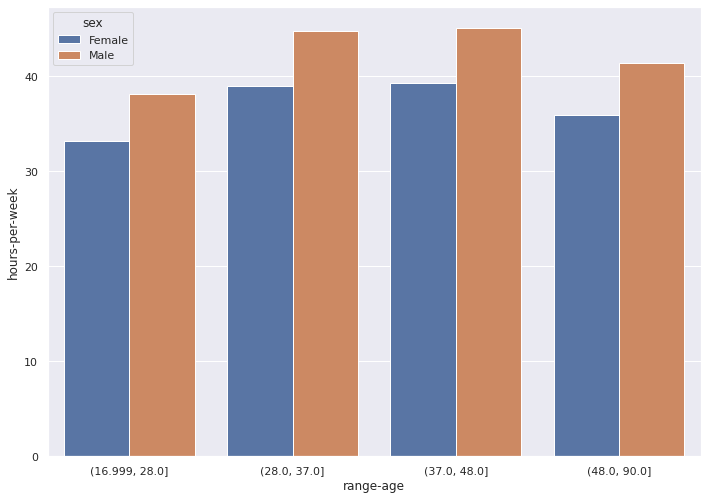

In [7]:
bar = sns.barplot(
    data=adults.groupby(['range-age','sex'],as_index=False).agg({'hours-per-week':'mean'}),
    x='range-age',
    y='hours-per-week',
    hue='sex'
)
bar;

По графику узнаем, что во всех группах по количеству часов лидируют мужчины. В начале карьеры (то есть с 17 до 28 лет) человек тратит около 32-36 часов в неделю на работу. У людей среднего возраста (с 29 до 48 лет) наблюдается пик максимума по часам (примерно 37-44 часа). А начиная с 49 лет количество часов снижается до 35-40 часов, и не доходит до начальных значений.

#### Вид образования и годовой заработок

Проверим известную гипотезу о ненадобности высшего образования для получения достойного зароботка

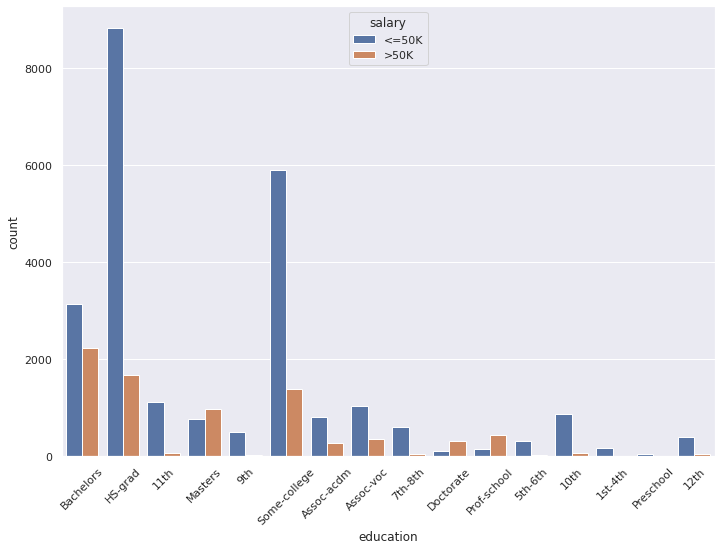

In [8]:
salary = sns.countplot(
    data=adults,
    x='education',
    hue='salary')
plt.xticks(rotation=45)
plt.show(salary)

Нет сильной связи между типом образования и заработком. Однако среди окончивших профессиональные учреждения большинство получают бОльший заработок.